In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
pip install pytictoc

In [ ]:
import numpy as np
import keras
import sklearn as sk
import cv2
from keras.applications.resnet import ResNet50
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, LSTM, ConvLSTM2D, Reshape, Conv2D, Dropout, BatchNormalization
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.wrappers import TimeDistributed
import glob
import os
import tensorflow as tf
import json
from keras.models import model_from_json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_test = "/content/drive/My Drive/CSCE636/Youtube_test/test2.mp4"

In [ ]:
import pytictoc

time_print = pytictoc.TicToc()
time_print.tic()
print(time_print)
videos = []
labels_2d = []
num_frames = 100
frame_rate = 5
time_3d = []
time_2d = []
i=0
for path in range(2):
  
  vidcap = cv2.VideoCapture(path_test)
  fps = vidcap.get(cv2.CAP_PROP_FPS)
  success, image = vidcap.read()
  frames = []
  

  time = []
  count = 0  # control to have the same number of frames
  count_fps = 0
  while success:
    
    
    success, image = vidcap.read()
    count += 1
    if(type(image).__module__ == np.__name__):
      new_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
      
      frames.append(new_image)
      time.append(count_fps*(1/fps))
      count_fps += 1
      if count==num_frames:
        count_fps = 0
        print("Frames_", str(count),", video_", str(i), "Done, Time_Elapsed: ", str(round(time_print.tocvalue(),3)), " Seconds")
        videos.append(frames)
        time_3d.append(time)
        count = 0
        frames = []
        time = []

  if (count < num_frames):
    while (count > 0 and count <= num_frames):
      frames.append(new_image)    # if the number of frames is lower than the num_frames, repeat the last image to reach num_frames
      count +=1
      time.append(count_fps*(1/fps))
      count_fps += 1
      
    videos.append(frames)
    time_3d.append(time)
  
  i+=1
  print("Video_", str(i),"Done, Time_Elapsed: ", str(round(time_print.tocvalue(),3)), " Seconds")


videos_2d_len = len(videos)
videos_3d = np.array(videos)

labels_2d = np.zeros((len(videos_3d),num_frames))
labels_2d[0:videos_2d_len,:] = 1

time_3d = np.array(time_3d)

Frames_ 100 , video_ 0 Done, Time_Elapsed:  1.154  Seconds
Frames_ 100 , video_ 0 Done, Time_Elapsed:  1.582  Seconds
Video_ 1 Done, Time_Elapsed:  1.75  Seconds
Frames_ 100 , video_ 1 Done, Time_Elapsed:  2.19  Seconds
Frames_ 100 , video_ 1 Done, Time_Elapsed:  2.619  Seconds
Video_ 2 Done, Time_Elapsed:  2.785  Seconds


In [ ]:
# ind = list(np.random.randint(0,len(videos_3d)-1,size=len(videos_3d)))
videos_3d_temp = videos_3d
videos_2d_shuffled = np.reshape(videos_3d_temp, (-1,224,224,3))
videos_2d_shuffled = videos_2d_shuffled[:len(videos_2d_shuffled):frame_rate]

time_3d_temp = time_3d
time_2d_shuffled = np.reshape(time_3d_temp, (-1,1))
time_2d_shuffled = time_2d_shuffled[:len(time_2d_shuffled):frame_rate]
time_2d_shuffled = time_2d_shuffled.T[0]

labels_2d_temp = labels_2d
labels_2d_shuffled = labels_2d_temp.flatten()
labels_2d_shuffled = labels_2d_shuffled[:len(labels_2d_shuffled):frame_rate]

In [ ]:
u_test = ResNet50_loaded.predict(videos_2d_shuffled)

In [ ]:
# serialize model to JSON
ResNet50_json = ResNet_for_TL.to_json()
with open("/content/drive/My Drive/CSCE636/Saved_Model/ResNet50.json", "w") as json_file:
    json_file.write(ResNet50_json)
# serialize weights to HDF5
ResNet_for_TL.save_weights("/content/drive/My Drive/CSCE636/Saved_Model/Weights/ResNet50.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

# load json and create model
ResNet50_json_file = open('/content/drive/My Drive/CSCE636/Saved_Model/ResNet50.json', 'r')
loaded_model_json = ResNet50_json_file.read()
ResNet50_json_file.close()
ResNet50_loaded = model_from_json(loaded_model_json)
# load weights into new model
ResNet50_loaded.load_weights("/content/drive/My Drive/CSCE636/Saved_Model/Weights/ResNet50.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# load weights into new model
ResNet50_loaded.load_weights("/content/drive/My Drive/CSCE636/Saved_Model/Weights/ResNet50.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
u_test

array([[0.99999666],
       [0.99999654],
       [0.99999475],
       [0.99999475],
       [0.999997  ],
       [0.9999926 ],
       [0.99997807],
       [0.9999957 ],
       [0.9999813 ],
       [0.9999639 ],
       [0.99996305],
       [0.99996305],
       [0.999967  ],
       [0.999967  ],
       [0.9999361 ],
       [0.9995678 ],
       [0.99923015],
       [0.99907863],
       [0.99919015],
       [0.9999652 ],
       [0.999967  ],
       [0.9999316 ],
       [0.999967  ],
       [0.99996734],
       [0.9999342 ],
       [0.999967  ],
       [0.999967  ],
       [0.999967  ],
       [0.999967  ],
       [0.99995506],
       [0.99999464],
       [0.99998033],
       [0.9999901 ],
       [0.9999634 ],
       [0.9999726 ],
       [0.9999901 ],
       [0.9999945 ],
       [0.9999945 ],
       [0.9999945 ],
       [0.99999595],
       [0.9999945 ],
       [0.9999956 ],
       [0.9999889 ],
       [0.99998784],
       [0.9999701 ],
       [0.9999801 ],
       [0.9999895 ],
       [0.999

In [ ]:
len(u_test)//frame

6.0

In [ ]:
frame

20.0

Text(0.5, 0, 'frame number')

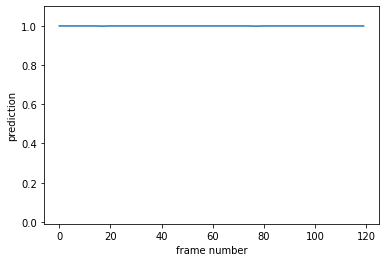

In [ ]:
# frame = num_frames/frame_rate
# xxx = np.arange(0, 19, 1/frame)
# plt.plot(xxx, u_test)
plt.plot(u_test)
plt.ylim(-.01,1.1)
plt.ylabel('prediction')
plt.xlabel('frame number')